**IMPORT LIBRARIES**

In [12]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime
from os import listdir, walk
from os.path import isfile, join

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import Grid
%matplotlib inline

import seaborn as sns
color = sns.color_palette()

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.metrics import adjusted_rand_score
import random

'''Algos'''
from kshape.core import kshape, zscore
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import KShape, TimeSeriesKMeans
import hdbscan

**DATA PREPARATION**

In [45]:
current_path = os.getcwd()

In [49]:
data_train = np.loadtxt("C:\\Users\\User\\Desktop\\Machine Learning\\Machine-Learning-Models\\Unsupervised Learning\\Time Series Clustering\\UCR_TS_Archive_2015\\ECG200\ECG200_TRAIN", delimiter=",")

In [50]:
data_test = np.loadtxt("C:\\Users\\User\\Desktop\\Machine Learning\\Machine-Learning-Models\\Unsupervised Learning\\Time Series Clustering\\UCR_TS_Archive_2015\\ECG200\ECG200_TEST", delimiter=",")

In [51]:
data_train

array([[-1.      ,  0.50206 ,  0.54216 , ...,  0.70501 ,  0.71382 ,
         0.43376 ],
       [ 1.      ,  0.14765 ,  0.80467 , ...,  0.036857, -1.2651  ,
        -0.20802 ],
       [-1.      ,  0.31665 ,  0.2432  , ...,  0.74885 ,  0.81804 ,
         0.53935 ],
       ...,
       [-1.      ,  0.19768 ,  0.45542 , ..., -0.12001 ,  0.042423,
         0.34329 ],
       [ 1.      ,  0.1795  ,  1.0384  , ...,  0.15105 ,  0.19338 ,
         0.45171 ],
       [ 1.      ,  0.073124,  0.77605 , ..., -0.066689, -0.17845 ,
        -0.25605 ]])

**PERFROM TRAIN TEST SPLIT**

In [52]:
X_train = to_time_series_dataset(data_train[:, 1:])
y_train = data_train[:, 0].astype(int)

In [53]:
X_test = to_time_series_dataset(data_test[:, 1:])
y_test = data_test[:, 0].astype(int)

**VISUALIZE THE DATA**

In [54]:
# Basic summary statistics
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 100
Number of unique classes: 2
Time series length: 96


Plot  1  Class  1.0


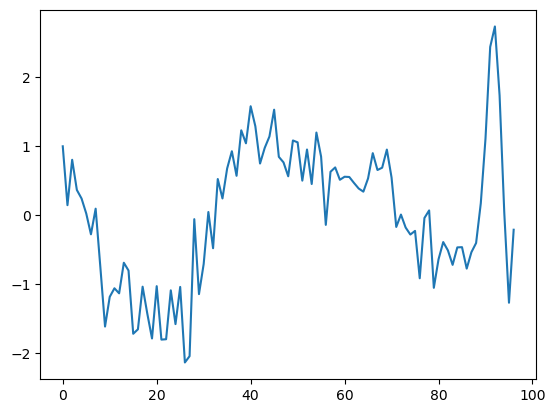

Plot  4  Class  1.0


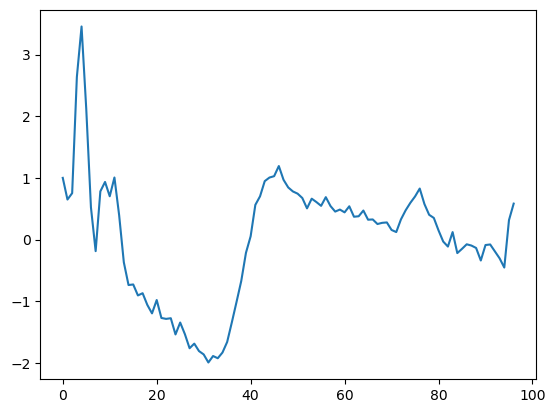

Plot  5  Class  1.0


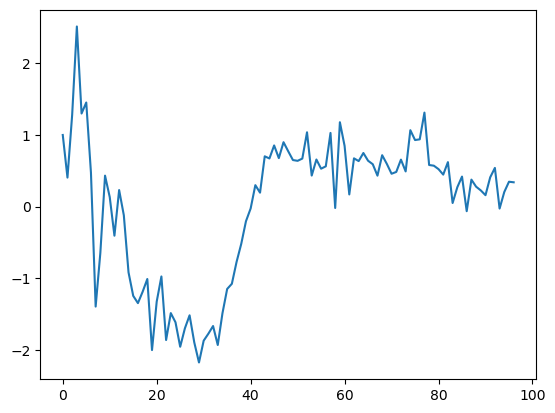

Plot  8  Class  1.0


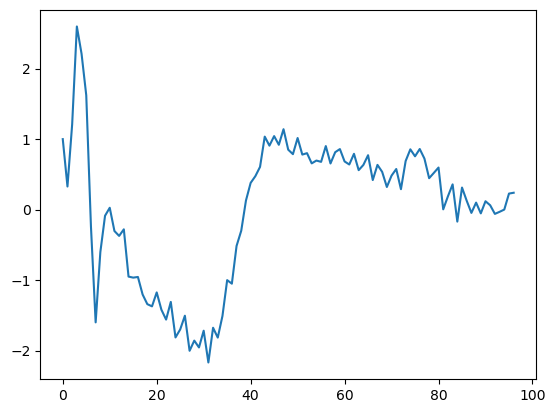

Plot  9  Class  1.0


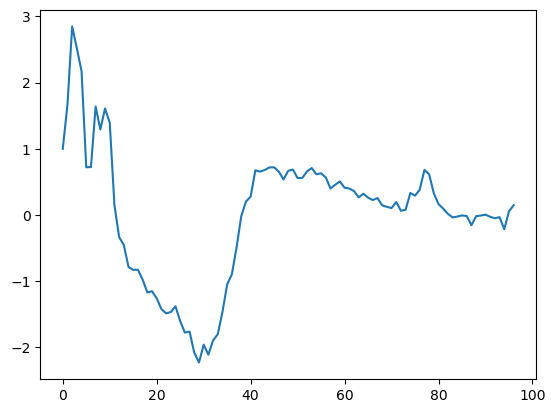

In [55]:
for i in range(0,10):
    if data_train[i,0]==1.0:
        print("Plot ",i," Class ",data_train[i,0])
        plt.plot(data_train[i])
        plt.show()

**PREPARE THE DATA SCALE**

In [56]:
# Prepare the data - Scale
X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_train)
X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_test)

**K-SHAPE ALGORITHM**

In [57]:
# Train using k-Shape
ks = KShape(n_clusters=2, max_iter=100, n_init=100,verbose=0)
ks.fit(X_train)

KShape(n_clusters=2, n_init=100, verbose=0)

In [58]:
# Make predictions on train set and calculate adjusted Rand index
preds = ks.predict(X_train)
ars = adjusted_rand_score(data_train[:,0],preds)
print("Adjusted Rand Index:", ars)

Adjusted Rand Index: 0.22651415713482093


In [59]:
# Make predictions on test set and calculate adjusted Rand index
preds_test = ks.predict(X_test)
ars = adjusted_rand_score(data_test[:,0],preds_test)
print("Adjusted Rand Index on Test Set:", ars)

Adjusted Rand Index on Test Set: 0.17859852076616728


**Explore ECG 5000**

In [60]:
data_train = np.loadtxt("C:\\Users\\User\\Desktop\Machine Learning\\Machine-Learning-Models\\Unsupervised Learning\\Time Series Clustering\\UCR_TS_Archive_2015\\ECG5000\\ECG5000_TRAIN", delimiter=",")

In [61]:
data_test = np.loadtxt("C:\\Users\\User\\Desktop\Machine Learning\\Machine-Learning-Models\\Unsupervised Learning\\Time Series Clustering\\UCR_TS_Archive_2015\\ECG5000\\ECG5000_TEST", delimiter=",")

In [62]:
data_joined = np.concatenate((data_train,data_test),axis=0)
data_train, data_test = train_test_split(data_joined, test_size=0.20, random_state=2019)

In [63]:
X_train = to_time_series_dataset(data_train[:, 1:])
y_train = data_train[:, 0].astype(int)
X_test = to_time_series_dataset(data_test[:, 1:])
y_test = data_test[:, 0].astype(int)

In [64]:
# Summary statistics
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 4000
Number of unique classes: 5
Time series length: 140


In [65]:
# Calculate number of readings per class
print("Number of time series in class 1.0:", 
      len(data_train[data_train[:,0]==1.0]))
print("Number of time series in class 2.0:", 
      len(data_train[data_train[:,0]==2.0]))
print("Number of time series in class 3.0:", 
      len(data_train[data_train[:,0]==3.0]))
print("Number of time series in class 4.0:", 
      len(data_train[data_train[:,0]==4.0]))
print("Number of time series in class 5.0:", 
      len(data_train[data_train[:,0]==5.0]))

Number of time series in class 1.0: 2327
Number of time series in class 2.0: 1423
Number of time series in class 3.0: 75
Number of time series in class 4.0: 156
Number of time series in class 5.0: 19


 Class  1.0  Count  2327


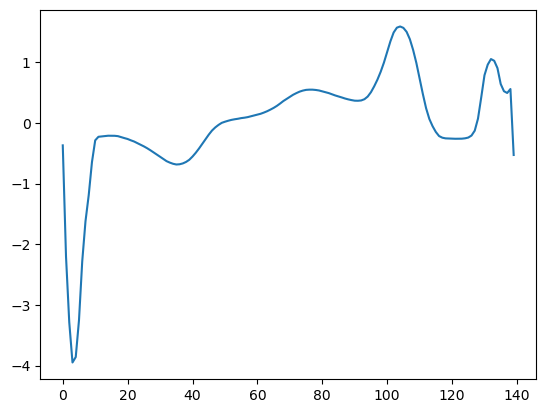

 Class  2.0  Count  1423


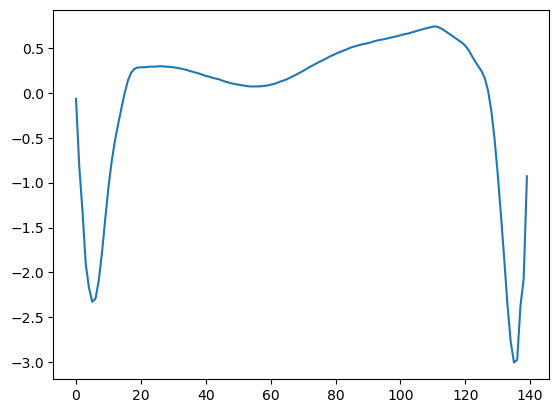

 Class  3.0  Count  75


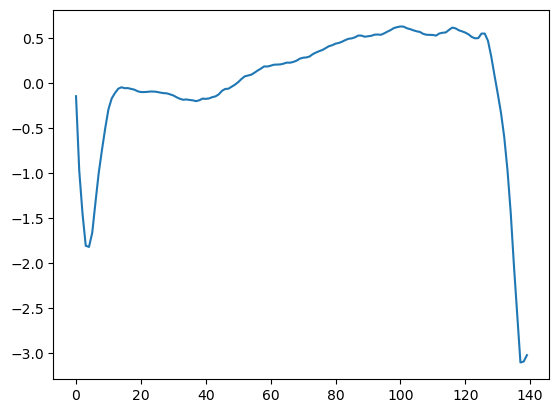

 Class  4.0  Count  156


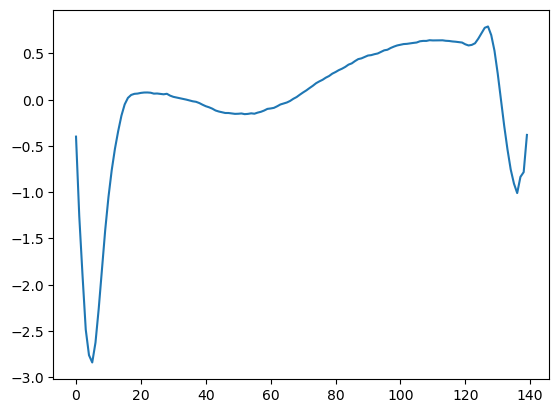

 Class  5.0  Count  19


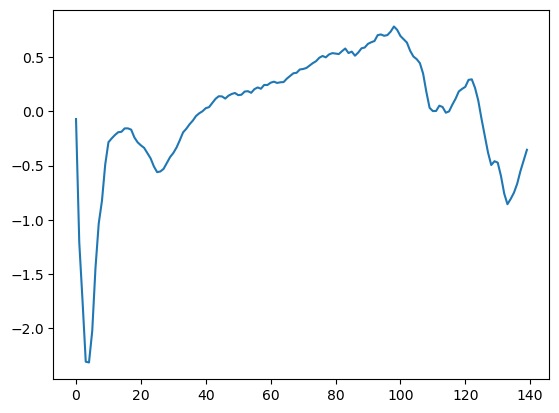

In [66]:
# Display readings from each class
for j in np.unique(data_train[:,0]):
    dataPlot = data_train[data_train[:,0]==j]
    cnt = len(dataPlot)
    dataPlot = dataPlot[:,1:].mean(axis=0)
    print(" Class ",j," Count ",cnt)
    plt.plot(dataPlot)
    plt.show()

In [67]:
# Prepare data - Scale
X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_train)
X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_test)

**Test Time Series Clustering Algos on Sample of ECG 5000**

**k-Shape**

In [68]:
# Train using k-Shape
ks = KShape(n_clusters=5, max_iter=100, n_init=10,verbose=1,random_state=2019)
ks.fit(X_train)

Init 1
0.015 --> 0.015 --> 
Init 2
0.014 --> 0.014 --> 
Init 3
0.018 --> 0.017 --> 0.018 --> 
Init 4
0.017 --> 0.016 --> 0.018 --> 
Init 5
0.016 --> 0.017 --> 
Init 6
0.012 --> 0.012 --> 
Init 7
0.016 --> 0.014 --> 0.016 --> 
Init 8
0.015 --> 0.014 --> 0.015 --> 
Init 9
0.017 --> 0.017 --> 0.018 --> 
Init 10
0.015 --> 0.016 --> 


KShape(n_clusters=5, n_init=10, random_state=2019, verbose=1)

In [69]:
# Predict on train set and calculate adjusted Rand index
preds = ks.predict(X_train)
ars = adjusted_rand_score(data_train[:,0],preds)
print("Adjusted Rand Index on Training Set:", ars)

Adjusted Rand Index on Training Set: 0.5553639462811412


In [70]:
# Predict on test set and calculate adjusted Rand index
preds_test = ks.predict(X_test)
ars = adjusted_rand_score(data_test[:,0],preds_test)
print("Adjusted Rand Index on Test Set:", ars)

Adjusted Rand Index on Test Set: 0.5301670526070555


In [71]:
# Evaluate goodness of the clusters
preds_test = preds_test.reshape(1000,1)
preds_test = np.hstack((preds_test,data_test[:,0].reshape(1000,1)))
preds_test = pd.DataFrame(data=preds_test)
preds_test = preds_test.rename(columns={0: 'prediction', 1: 'actual'})

counter = 0
for i in np.sort(preds_test.prediction.unique()):
    print("Predicted Cluster ", i)
    print(preds_test.actual[preds_test.prediction==i].value_counts())
    print()
    cnt = preds_test.actual[preds_test.prediction==i] .value_counts().iloc[1:].sum()
    counter = counter + cnt
print("Count of Non-Primary Points: ", counter)

Predicted Cluster  0.0
actual
2.0    127
3.0      9
4.0      6
5.0      1
Name: count, dtype: int64

Predicted Cluster  1.0
actual
2.0    197
1.0     18
4.0      9
3.0      3
Name: count, dtype: int64

Predicted Cluster  2.0
actual
2.0    18
4.0    18
5.0     3
3.0     2
1.0     2
Name: count, dtype: int64

Predicted Cluster  3.0
actual
1.0    130
3.0      3
4.0      2
2.0      1
5.0      1
Name: count, dtype: int64

Predicted Cluster  4.0
actual
1.0    442
3.0      4
4.0      3
2.0      1
Name: count, dtype: int64

Count of Non-Primary Points:  86


**Time Series k-Means**

In [72]:
# Train using Time Series k-Means
km = TimeSeriesKMeans(n_clusters=5, max_iter=100, n_init=100, metric="euclidean", verbose=1, random_state=2019)
km.fit(X_train)

Init 1
34.251 --> 26.322 --> 25.939 --> 25.666 --> 25.454 --> 25.185 --> 24.908 --> 24.585 --> 24.346 --> 24.216 --> 24.159 --> 24.130 --> 24.118 --> 24.116 --> 24.116 --> 24.115 --> 24.114 --> 24.114 --> 24.112 --> 24.111 --> 24.110 --> 24.109 --> 24.108 --> 24.108 --> 24.108 --> 
Init 2
33.290 --> 25.746 --> 25.402 --> 25.279 --> 25.175 --> 25.099 --> 25.037 --> 24.966 --> 24.941 --> 24.927 --> 24.908 --> 24.894 --> 24.878 --> 24.860 --> 24.838 --> 24.762 --> 24.600 --> 24.481 --> 24.394 --> 24.315 --> 24.258 --> 24.224 --> 24.199 --> 24.184 --> 24.175 --> 24.165 --> 24.150 --> 24.132 --> 24.119 --> 24.113 --> 24.110 --> 24.109 --> 24.109 --> 24.109 --> 24.109 --> 24.108 --> 24.108 --> 24.108 --> 24.108 --> 24.108 --> 
Init 3
36.640 --> 27.281 --> 26.645 --> 26.105 --> 25.497 --> 25.229 --> 25.107 --> 25.051 --> 25.011 --> 24.990 --> 24.976 --> 24.956 --> 24.939 --> 24.927 --> 24.916 --> 24.903 --> 24.890 --> 24.873 --> 24.854 --> 24.823 --> 24.719 --> 24.546 --> 24.439 --> 24.348 --

TimeSeriesKMeans(max_iter=100, n_clusters=5, n_init=100, random_state=2019,
                 verbose=1)

In [73]:
# Predict on training set and evaluate using adjusted Rand index
preds = km.predict(X_train)
ars = adjusted_rand_score(data_train[:,0],preds)
print("Adjusted Rand Index of Time Series k-Means on Training Set:", ars)

Adjusted Rand Index of Time Series k-Means on Training Set: 0.5063464656715959


In [74]:
# Predict on test set and evaluate using adjusted Rand index
preds_test = km.predict(X_test)
ars = adjusted_rand_score(data_test[:,0],preds_test)
print("Adjusted Rand Index of Time Series k-Means on Test Set:", ars)

Adjusted Rand Index of Time Series k-Means on Test Set: 0.4864981997585834


**HDBSCAN**

In [75]:
# Train model and evaluate on training set
min_cluster_size = 5
min_samples = None
alpha = 1.0
cluster_selection_method = 'eom'
prediction_data = True

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, alpha=alpha, cluster_selection_method=cluster_selection_method, prediction_data=prediction_data)

preds = hdb.fit_predict(X_train.reshape(4000,140))
ars = adjusted_rand_score(data_train[:,0],preds)
print("Adjusted Rand Index on Training Set:", ars)

Adjusted Rand Index on Training Set: 0.7628260922190984


In [76]:
# Predict on test set and evaluate
preds_test = hdbscan.prediction.approximate_predict( \
                hdb, X_test.reshape(1000,140))
ars = adjusted_rand_score(data_test[:,0],preds_test[0])
print("Adjusted Rand Index on Test Set:", ars)

Adjusted Rand Index on Test Set: 0.7230550599125711


**Compare Time Series Clustering Algos on Full ECG 5000 Dataset**

In [77]:
# Load the datasets
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'ucr_time_series_data', ''])

mypath = current_path + file
d = []
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    for i in dirnames:
        newpath = os.path.sep.join([mypath, i, ""])
        onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
        f.extend(onlyfiles)
    d.extend(dirnames)
    break

**k-Shape Experiment - FULL RUN**

In [78]:
# Create dataframe
kShapeDF = pd.DataFrame(data=[],index=[v for v in d], columns=["Train ARS","Test ARS"])

In [79]:
# Train and Evaluate k-Shape
class ElapsedTimer(object):
    def __init__(self):
        self.start_time = time.time()
    def elapsed(self,sec):
        if sec < 60:
            return str(sec) + " sec"
        elif sec < (60 * 60):
            return str(sec / 60) + " min"
        else:
            return str(sec / (60 * 60)) + " hr"
    def elapsed_time(self):
        print("Elapsed: %s " % self.elapsed(time.time() - self.start_time))
        return (time.time() - self.start_time)

timer = ElapsedTimer()
cnt = 0
for i in d:
    cnt += 1
    print("Dataset ", cnt)
    newpath = os.path.sep.join([mypath, i, ""])
    onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
    j = onlyfiles[0]
    k = onlyfiles[1]
    data_train = np.loadtxt(newpath+j, delimiter=",")
    data_test = np.loadtxt(newpath+k, delimiter=",")

    data_joined = np.concatenate((data_train,data_test),axis=0)
    data_train, data_test = train_test_split(data_joined, test_size=0.20, random_state=2019)

    X_train = to_time_series_dataset(data_train[:, 1:])
    y_train = data_train[:, 0].astype(np.int)
    X_test = to_time_series_dataset(data_test[:, 1:])
    y_test = data_test[:, 0].astype(np.int)
    
    X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_train)
    X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.) .fit_transform(X_test)
    
    classes = len(np.unique(data_train[:,0]))
    ks = KShape(n_clusters=classes, max_iter=10, n_init=3,verbose=0)
    ks.fit(X_train)

    print(i)
    preds = ks.predict(X_train)
    ars = adjusted_rand_score(data_train[:,0],preds)
    print("Adjusted Rand Index on Training Set:", ars)
    kShapeDF.loc[i,"Train ARS"] = ars
    
    preds_test = ks.predict(X_test)
    ars = adjusted_rand_score(data_test[:,0],preds_test)
    print("Adjusted Rand Index on Test Set:", ars)
    kShapeDF.loc[i,"Test ARS"] = ars
    
kShapeTime = timer.elapsed_time()

Elapsed: 0.0010073184967041016 sec 


In [80]:
print("Time to Run k-Shape Experiment in Minutes:", kShapeTime/60)

Time to Run k-Shape Experiment in Minutes: 3.3235549926757814e-05


In [97]:
#kShapeDF.to_pickle(os.path.sep.join(["C:\\Users\\User\\Desktop\\Machine Learning\\Machine-Learning-Models\\Unsupervised Learning\\Time Series Clustering", 'datasets', 'pickled_data', "kShapeDF.pickle"]))

**k-Means Experiment - FULL RUN**

In [82]:
# Create dataframe
kMeansDF = pd.DataFrame(data=[],index=[v for v in d], columns=["Train ARS","Test ARS"])

In [83]:
# Train and Evaluate k-Means
timer = ElapsedTimer()
cnt = 0
for i in d:
    cnt += 1
    print("Dataset ", cnt)
    newpath = os.path.sep.join([mypath, i, ""])
    onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
    j = onlyfiles[0]
    k = onlyfiles[1]
    data_train = np.loadtxt(newpath+j, delimiter=",")
    data_test = np.loadtxt(newpath+k, delimiter=",")

    data_joined = np.concatenate((data_train,data_test),axis=0)
    data_train, data_test = train_test_split(data_joined, \
                                        test_size=0.20, random_state=2019)

    X_train = to_time_series_dataset(data_train[:, 1:])
    y_train = data_train[:, 0].astype(np.int)
    X_test = to_time_series_dataset(data_test[:, 1:])
    y_test = data_test[:, 0].astype(np.int)
    
    X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.) \
                                    .fit_transform(X_train)
    X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.) \
                                    .fit_transform(X_test)
    
    classes = len(np.unique(data_train[:,0]))
    km = TimeSeriesKMeans(n_clusters=5, max_iter=10, n_init=10, \
                          metric="euclidean", verbose=0, random_state=2019)
    km.fit(X_train)

    print(i)
    preds = km.predict(X_train)
    ars = adjusted_rand_score(data_train[:,0],preds)
    print("Adjusted Rand Index on Training Set:", ars)
    kMeansDF.loc[i,"Train ARS"] = ars
    
    preds_test = km.predict(X_test)
    ars = adjusted_rand_score(data_test[:,0],preds_test)
    print("Adjusted Rand Index on Test Set:", ars)
    kMeansDF.loc[i,"Test ARS"] = ars
    
kMeansTime = timer.elapsed_time()

Elapsed: 0.0010001659393310547 sec 


In [84]:
print("Time to Run k-Means Experiment in Minutes:", kMeansTime/60)

Time to Run k-Means Experiment in Minutes: 3.337860107421875e-05


In [98]:
#kMeansDF.to_pickle(os.path.sep.join([current_path, "datasets", "pickled_data", "kMeansDF.pickle"]))

**HDBSCAN Experiment - FULL RUN**

In [86]:
# Create dataframe
hdbscanDF = pd.DataFrame(data=[],index=[v for v in d], columns=["Train ARS","Test ARS"])

In [87]:
# Train and Evaluate HDBSCAN
timer = ElapsedTimer()
cnt = 0
for i in d:
    cnt += 1
    print("Dataset ", cnt)
    newpath = os.path.sep.join([mypath, i, ""])
    onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
    j = onlyfiles[0]
    k = onlyfiles[1]
    data_train = np.loadtxt(newpath+j, delimiter=",")
    data_test = np.loadtxt(newpath+k, delimiter=",")

    data_joined = np.concatenate((data_train,data_test),axis=0)
    data_train, data_test = train_test_split(data_joined, \
                                    test_size=0.20, random_state=2019)

    X_train = data_train[:, 1:]
    y_train = data_train[:, 0].astype(np.int)
    X_test = data_test[:, 1:]
    y_test = data_test[:, 0].astype(np.int)
    
    X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.) \
                                    .fit_transform(X_train)
    X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.)  \
                                    .fit_transform(X_test)
    
    classes = len(np.unique(data_train[:,0]))
    min_cluster_size = 5
    min_samples = None
    alpha = 1.0
    cluster_selection_method = 'eom'
    prediction_data = True

    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
                          min_samples=min_samples, alpha=alpha, \
                          cluster_selection_method= \
                              cluster_selection_method, \
                          prediction_data=prediction_data)

    print(i)
    preds = hdb.fit_predict(X_train.reshape(X_train.shape[0], \
                                            X_train.shape[1]))
    ars = adjusted_rand_score(data_train[:,0],preds)
    print("Adjusted Rand Index on Training Set:", ars)
    hdbscanDF.loc[i,"Train ARS"] = ars
    
    preds_test = hdbscan.prediction.approximate_predict(hdb, 
                            X_test.reshape(X_test.shape[0], \
                                           X_test.shape[1]))
    ars = adjusted_rand_score(data_test[:,0],preds_test[0])
    print("Adjusted Rand Index on Test Set:", ars)
    hdbscanDF.loc[i,"Test ARS"] = ars
    
hdbscanTime = timer.elapsed_time()

Elapsed: 0.0020012855529785156 sec 


In [88]:
print("Time to Run HDBSCAN Experiment in Minutes:", hdbscanTime/60)

Time to Run HDBSCAN Experiment in Minutes: 3.3354759216308595e-05


In [99]:
#hdbscanDF.to_pickle(os.path.sep.join([current_path, "datasets", "pickled_data", "hdbscanDF.pickle"]))

**Compare All Three Experiments**

In [90]:
print("k-Shape Results")
kShapeDF.mean()

k-Shape Results


Train ARS    NaN
Test ARS     NaN
dtype: object

In [91]:
print("k-Means Results")
kMeansDF.mean()

k-Means Results


Train ARS    NaN
Test ARS     NaN
dtype: object

In [92]:
print("HDBSCAN Results")
hdbscanDF.mean()

HDBSCAN Results


Train ARS    NaN
Test ARS     NaN
dtype: object

In [93]:
# Count top place finishes
timeSeriesClusteringDF = pd.DataFrame(data=[],index=kShapeDF.index,columns=["kShapeTest", "kMeansTest", "hdbscanTest"])

timeSeriesClusteringDF.kShapeTest = kShapeDF["Test ARS"]
timeSeriesClusteringDF.kMeansTest = kMeansDF["Test ARS"]
timeSeriesClusteringDF.hdbscanTest = hdbscanDF["Test ARS"]

tscResults = timeSeriesClusteringDF.copy()

for i in range(0,len(tscResults)):
    maxValue = tscResults.iloc[i].max()
    tscResults.iloc[i][tscResults.iloc[i]==maxValue]=1
    minValue = tscResults .iloc[i].min()
    tscResults.iloc[i][tscResults.iloc[i]==minValue]=-1
    medianValue = tscResults.iloc[i].median()
    tscResults.iloc[i][tscResults.iloc[i]==medianValue]=0

In [94]:
# Show results
tscResultsDF = pd.DataFrame(data=np.zeros((3,3)), index=["firstPlace","secondPlace","thirdPlace"], columns=["kShape", "kMeans","hdbscan"])
tscResultsDF.loc["firstPlace",:] = tscResults[tscResults==1].count().values
tscResultsDF.loc["secondPlace",:] = tscResults[tscResults==0].count().values
tscResultsDF.loc["thirdPlace",:] = tscResults[tscResults==-1].count().values
tscResultsDF

,kShape,kMeans,hdbscan
firstPlace,0.0,0.0,0.0
secondPlace,0.0,0.0,0.0
thirdPlace,0.0,0.0,0.0


**Conclusion**

In [100]:
import datetime as dt
print("Completed: ", dt.datetime.now())

Completed:  2024-02-27 01:43:01.273945
